# SCORE PREDICTION USING SUPERVISED ML

![](https://c.tenor.com/pRKMMoLc1eYAAAAM/score-google.gif)

Aim:To predict the percentage of a student based on the numbers of study hours 

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Load the dataset

link="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(link) 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Basic information about the dataset

In [3]:
df.shape

(25, 2)

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.duplicated().any()

False

# Data Visualization

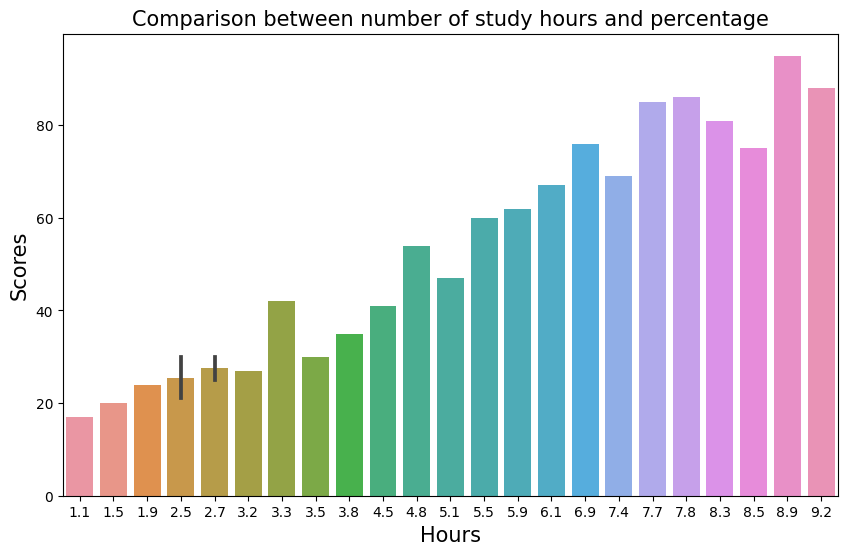

In [8]:
# Data Visualization: Bar Plot
# Comparing the Number of Study Hours and Corresponding Scores
plt.figure(figsize=(10, 6))
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.title('Comparison between number of study hours and percentage', fontsize=15)

# Use the 'x' and 'y' arguments to specify the data columns
sns.barplot(x='Hours', y='Scores', data=df)

plt.show()


Maximum score is got by 8.9 hours which is approximately 95.

<Axes: title={'center': 'Comparison between number of study hours and percentage'}, xlabel='No of Hours', ylabel='Score'>

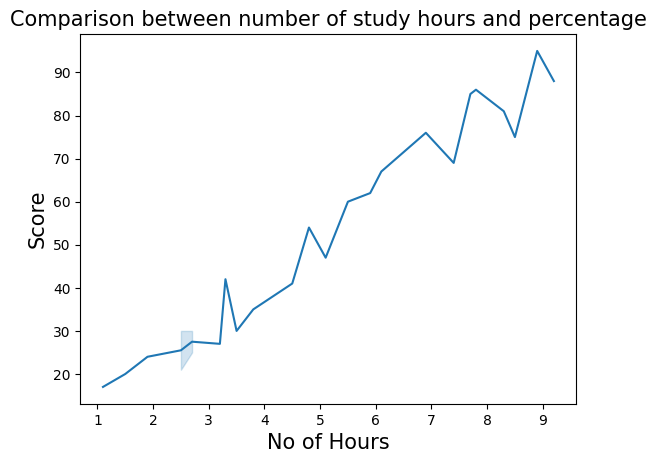

In [9]:
# Data Visualization: Line Plot
# Comparing Study Hours and Corresponding Scores


plt.xlabel('No of Hours',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title('Comparison between number of study hours and percentage',fontsize=15)

sns.lineplot(x='Hours',y='Scores',data=df)

From this plot we observe that as the amount of study time increases, there is a positive correlation with higher scores, suggesting that more study hours lead to improved performance.

<function matplotlib.pyplot.show(close=None, block=None)>

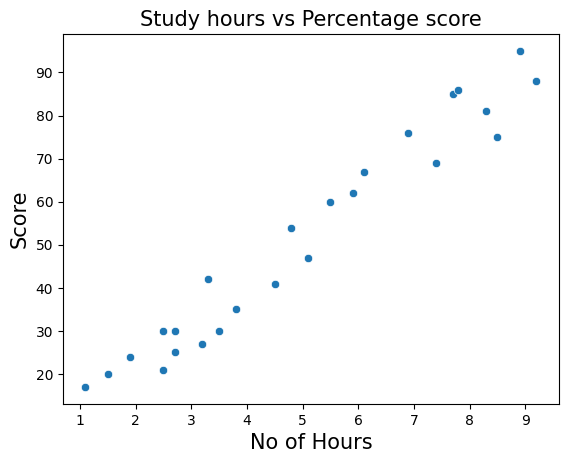

In [10]:
# Data Visualization: Scatter Plot
# Relationship between Study Hours and Percentage Score

plt.xlabel('No of Hours',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title('Study hours vs Percentage score',fontsize=15)
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

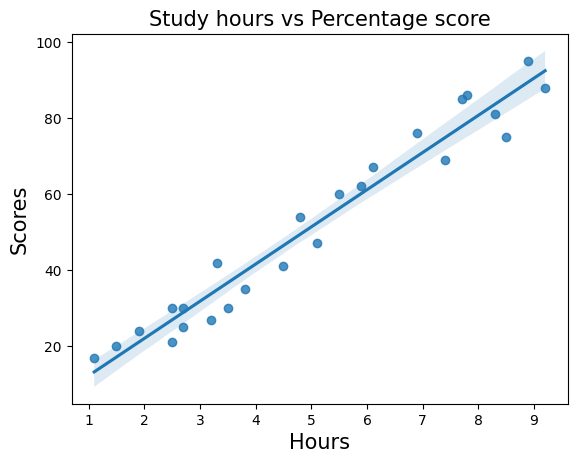

In [11]:
# Data Visualization: Regression Plot
# Visualizing the Linear Relationship between Study Hours and Percentage Score


plt.xlabel('No of Hours',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title('Study hours vs Percentage score',fontsize=15)
sns.regplot(x='Hours',y='Scores',data=df)
plt.show

# Seperating input and output variables

In [12]:
#spliting into dependent and independent variables
x=df.drop('Scores',axis=1)
y=df.Scores

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


# Applying Linear Regression model

In [14]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [15]:
#Checking Model Accuarcy on Training Data
model.score(x_train,y_train)

0.942047765068303

In [16]:
#Checking model accuracy on testing  data
model.score(x_test,y_test)

0.9752298585615701

In [17]:
#predict the value for the test data
y_predict=model.predict(x_test)
y_predict

array([13.23705714, 26.92318188, 21.05769985, 92.4210646 , 69.9367168 ])

In [18]:
#comparing actual values and predicted values
pd.DataFrame({'Actual':y_test,'Predicted':y_predict})

,Actual,Predicted
14,17,13.237057
0,21,26.923182
17,24,21.057700
6,88,92.421065
23,76,69.936717


# Prediction of new data

Which shows that if a person study for 9.25 hours ,he/she get 92.90 percentage score in his/her result according to the given data and trained model.

In [19]:
#Predicting Score when number of hours=9.25
hours = 9.25
predicted = model.predict([[hours]])
print("Number of hours =", hours)
print("Predicted score is =", predicted[0])

Number of hours = 9.25
Predicted score is = 92.9098547701573


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
# Evaluate the model

from sklearn import metrics  
mae = metrics.mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error:", mae)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R-Squared:',metrics.r2_score(y_test, y_predict))

Mean Absolute Error: 4.622554539608846
RMSE: 4.779334015201551
R-Squared: 0.9752298585615701
